### **Predict Annual Returns**


**Problem Statement**

Societe Generale (SocGen) is a French multinational banking and financial services company. With over 1,54,000 employees, based in 76 countries, they handle over 32 million clients throughout the world on a daily basis.
They provide services like retail banking, corporate and investment banking, asset management, portfolio management, insurance and other financial services.

With this problem, we’ll help SocGen in building the intelligence to predict, act and maximise their portfolio returns. Think of a portfolio as a basket. The basket can contain diverse instruments such as equity stocks, debentures, mutual funds etc. Each portfolio is allotted to portfolio managers. Intelligence about future performance would help these portfolio managers to act and take necessary steps in order to overcome losses.

In this challenge, given the randomly sampled data, you’ve to predict the portfolio’s annual returns. Keeping data privacy in mind, some of the variables have been anonymised.

**Description**

You are given three files to download: train, test and sample submission. You have to make predictions for 4801 portfolios.
 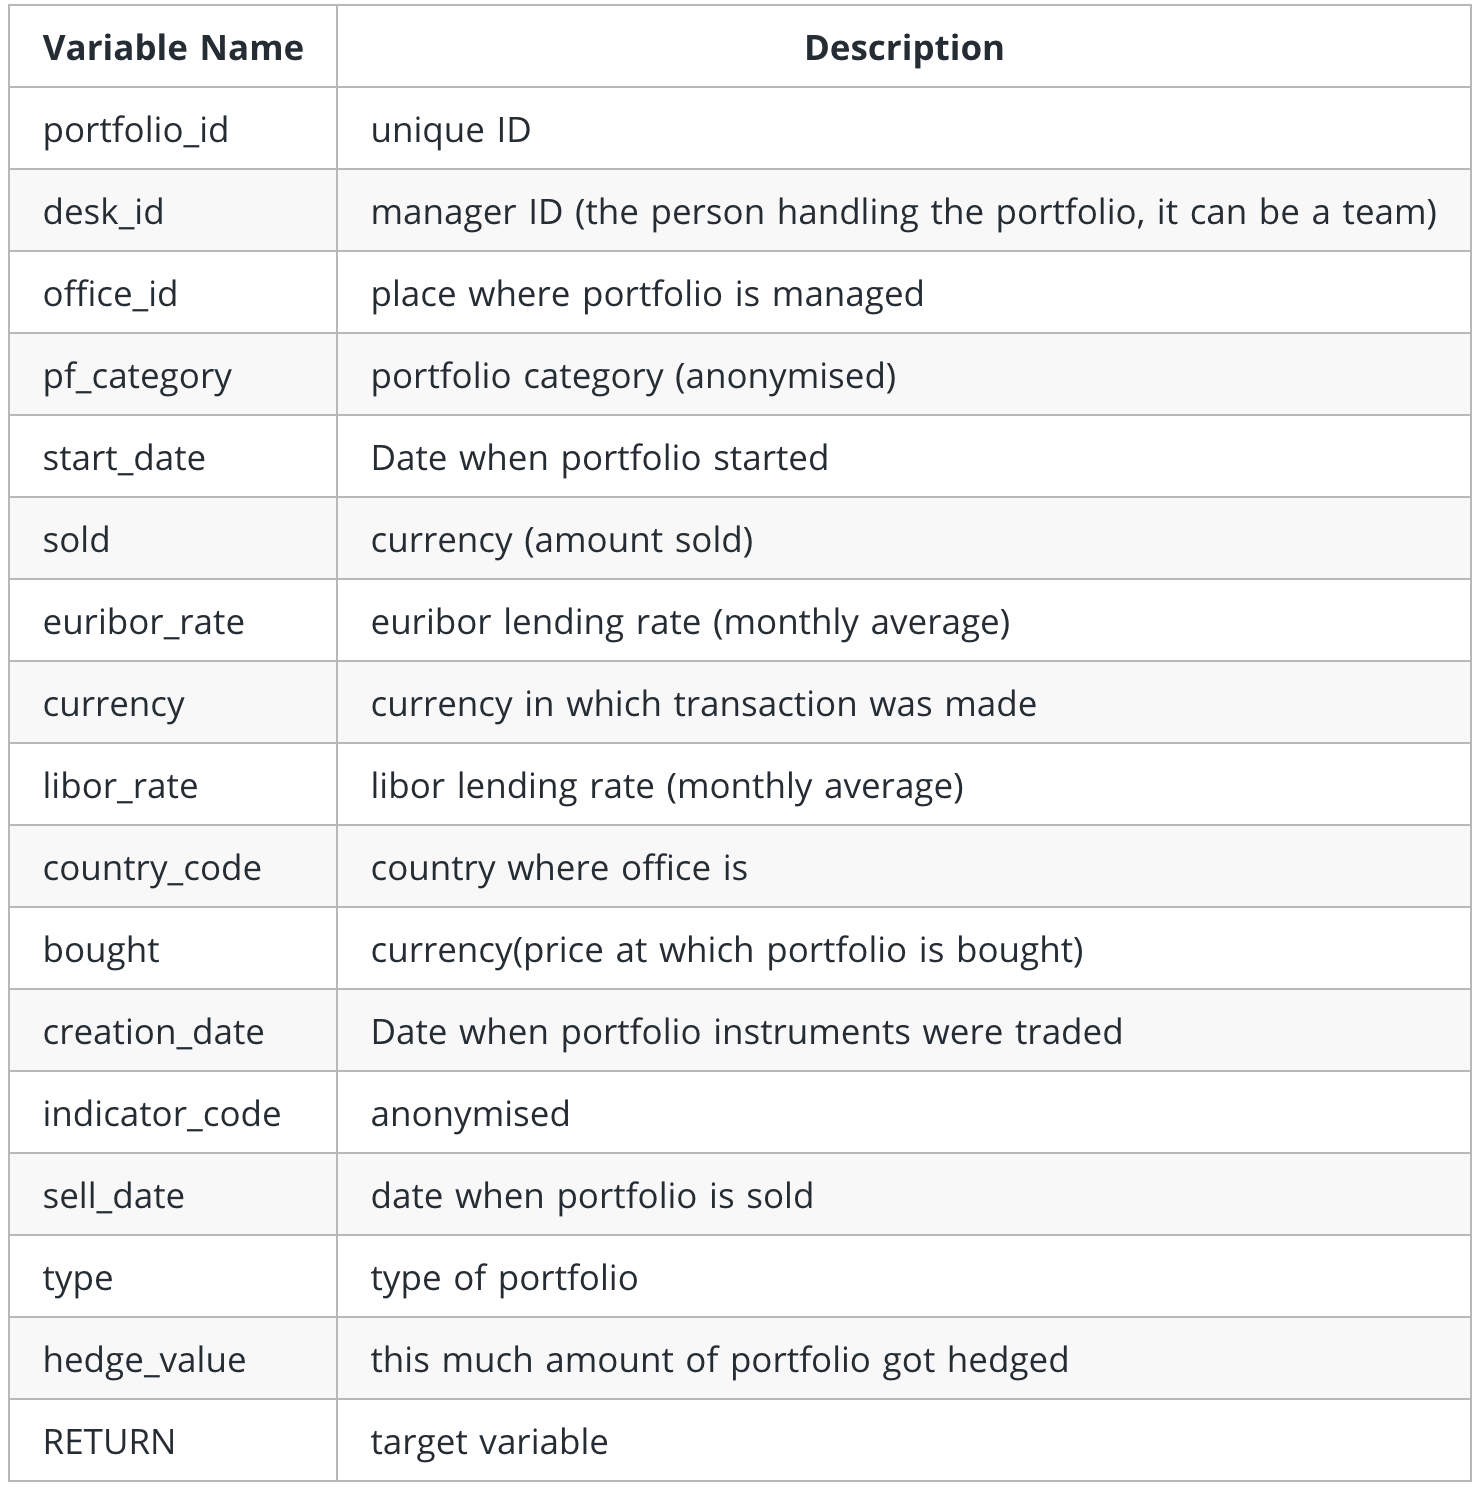

** Explanation**
Start_date might differ from creation_date. Creation_date is the date when the instrument (such as a stock) was bought. Once the stocks are bought, they don’t immediately get credited to the buyer’s account. Most stock exchanges, make the trade on next day or might take more days. For example, in india, it takes 24 hours for the stocks to show up in buyers account.
Hedging is used to offset risk chances by investing in negatively correlated instruments. For example: Gold is generally a favourite choice of investors to be used as a hedging investment for stock investments i.e when stock market falls, gold prices go up.


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset
train = pd.read_csv('../data/train.csv', parse_dates=['start_date','creation_date','sell_date'])
test = pd.read_csv('../data/test.csv', parse_dates=['start_date','creation_date','sell_date'])
sample_submission = pd.read_csv('../data/sample_submission.csv')

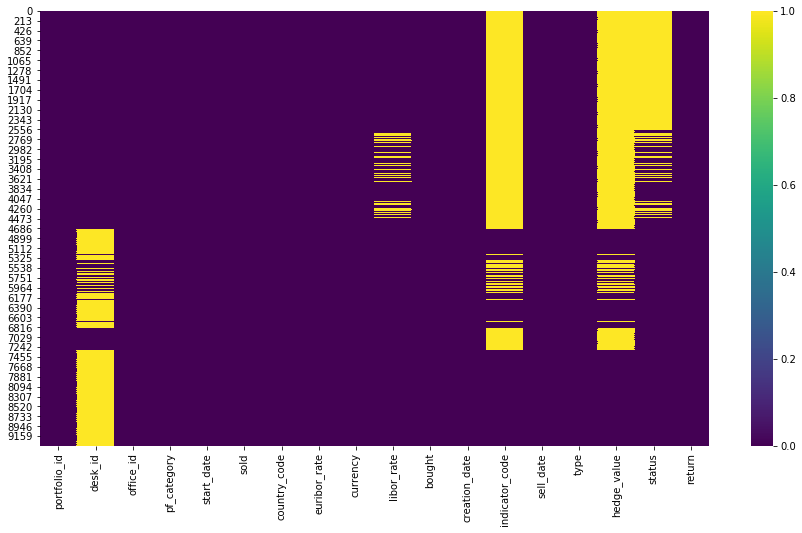

In [3]:
plt.figure(figsize=(15,8))
sns.heatmap(train.isnull(), cmap='viridis')

In [4]:
print "Length of train rows:", len(train)
ov_df = pd.DataFrame({'Dtype': train.dtypes, 'Unique values': train.nunique() ,
             'Number of Missing values': train.isnull().sum() ,
              'Percentage Missing': (train.isnull().sum() / len(train)) * 100
             }).sort_values(by='Number of Missing values',ascending = False)
ov_df

Length of train rows: 9366


,Dtype,Number of Missing values,Percentage Missing,Unique values
hedge_value,object,5701,60.869101,2
indicator_code,object,5699,60.847747,1
desk_id,object,3665,39.130899,3992
status,object,3084,32.927611,1
libor_rate,float64,474,5.060858,468
bought,float64,2,0.021354,8710
sold,float64,2,0.021354,4423
type,object,0,0.000000,8
sell_date,datetime64[ns],0,0.000000,2632
creation_date,datetime64[ns],0,0.000000,2612


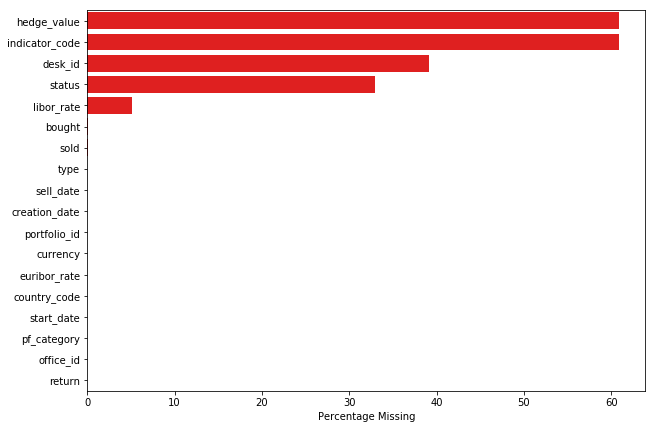

In [5]:
plt.figure(figsize=(10,7))
sns.barplot(y=ov_df.index, x=ov_df['Percentage Missing'], color='r', )

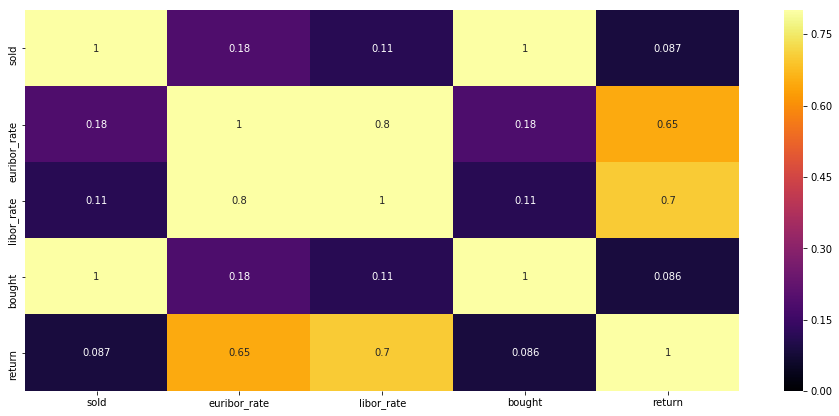

In [6]:
plt.figure(figsize=(16,7))
sns.heatmap(train.corr(), cmap='inferno', vmin=0, vmax=0.8, annot=True)

<img src= "http://snappyimages.nextwavesrl.netdna-cdn.com/img/ef87d280f3f0077e3caa8db1ca76b790.png" , width=75% >

In [7]:
#Filling with Mean
train['libor_rate'].fillna((train['libor_rate'].mean()), inplace=True)
train['sold'].fillna((train['sold'].mean()), inplace=True)
train['bought'].fillna((train['bought'].mean()), inplace=True)

In [8]:
train[['libor_rate','sold','bought']].isnull().any()

libor_rate    False
sold          False
bought        False
dtype: bool

In [9]:
train.drop('desk_id', axis=1, inplace=True)
train.drop('portfolio_id', axis=1, inplace=True)
train.drop('office_id', axis=1, inplace=True)

In [10]:
train

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,B,2004-07-20,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,2004-07-20,NaN,2004-08-12,B,NaN,NaN,0.02496
1,A,2004-07-09,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,2004-07-23,NaN,2004-08-12,C,NaN,NaN,0.05496
2,A,2004-07-23,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,2004-07-23,NaN,2004-08-17,A,NaN,NaN,0.02496
3,A,2004-06-09,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,2004-07-23,NaN,2004-07-13,A,NaN,NaN,0.02496
4,B,2004-06-09,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,2004-07-23,NaN,2004-07-13,B,NaN,NaN,0.02496
5,A,2004-07-07,48741000.0,T,0.02074,USD,2.332216,4.865127e+07,2004-07-26,NaN,2004-08-10,A,NaN,NaN,0.02490
6,A,2004-07-06,60593500.0,T,0.02074,USD,2.332216,6.048181e+07,2004-07-26,NaN,2004-08-09,A,NaN,NaN,0.02493
7,B,2004-07-06,134200000.0,T,0.02074,USD,2.332216,1.339526e+08,2004-07-26,NaN,2004-08-09,B,NaN,NaN,0.02493
8,A,2004-04-19,82929000.0,T,0.02074,USD,2.332216,8.250616e+07,2004-07-26,NaN,2004-07-20,A,NaN,NaN,0.02460
9,A,2004-04-14,212476000.0,T,0.02074,USD,2.332216,2.114140e+08,2004-07-27,NaN,2004-07-13,A,NaN,NaN,0.02466


In [11]:
print train['hedge_value'].value_counts()
print train['indicator_code'].value_counts()
print train['status'].value_counts()

False    2437
True     1228
Name: hedge_value, dtype: int64
True    3667
Name: indicator_code, dtype: int64
True    6282
Name: status, dtype: int64


**Note**:
There is just one value filled for indicator_code and status columns. This can be taken in two ways - 
1. Missing values are intentionally left as in False boolean 
2. Missing values might contain True or False values

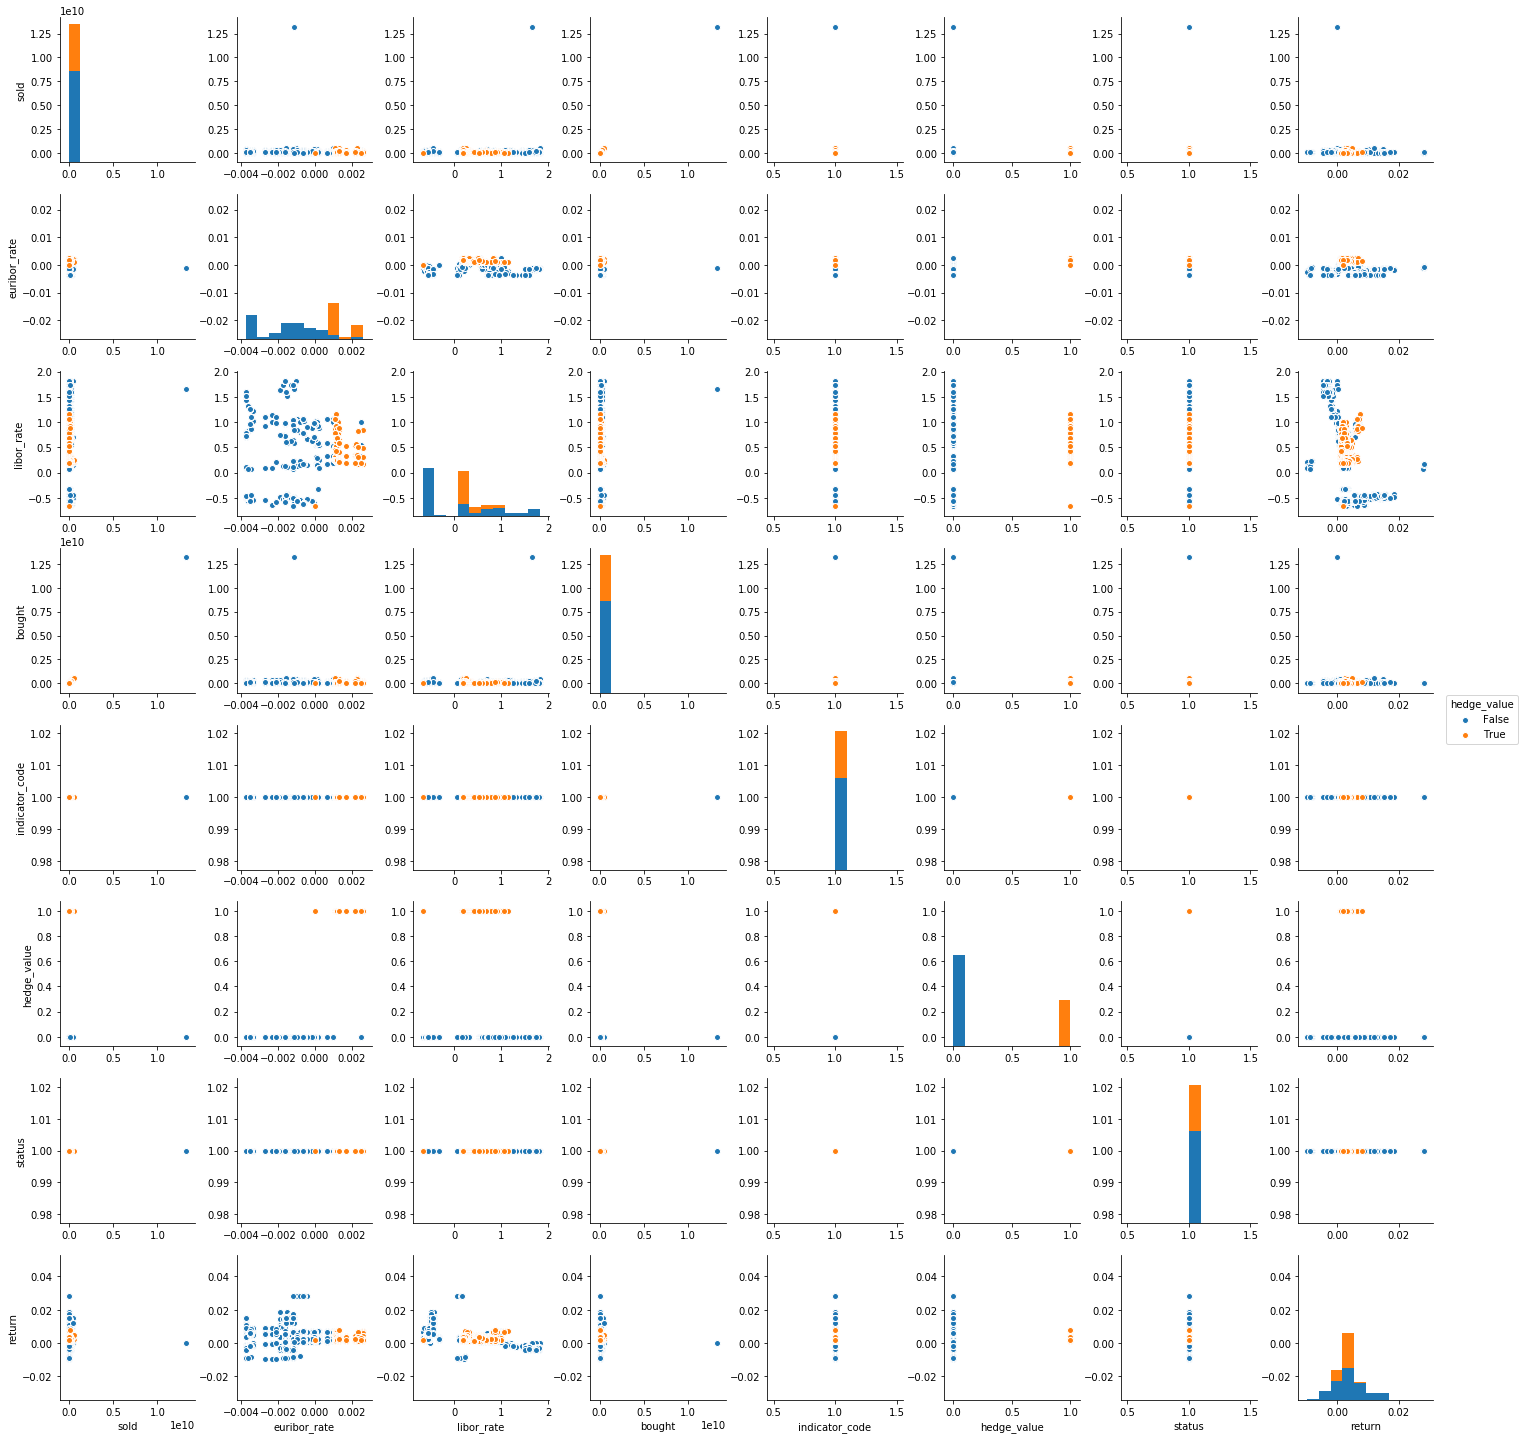

In [12]:
sns.pairplot(train, hue='hedge_value')

Summary:

 **Librore_rate** vs. **Euribor_rate** differentiates || **Euribore_rate** vs **Return** is crucial the hedge values.

Text(0.5,1,u'Euribor vs. Libore Rate')

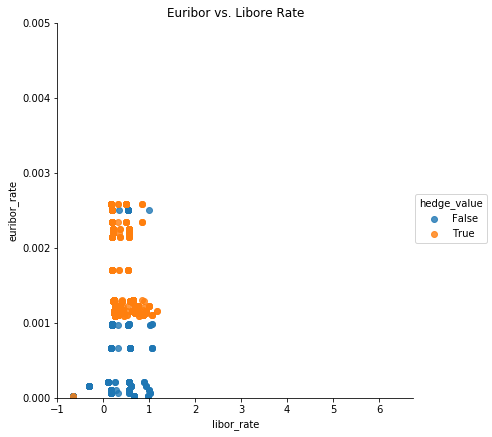

In [13]:
lm1 = sns.lmplot(y='euribor_rate', x='libor_rate', data=train, 
                 hue='hedge_value', fit_reg=False, size=6)
lm1.set(ylim=(0, 0.0050))
lm1.set(xlim=(-1, None))
plt.title('Euribor vs. Libore Rate')

Text(0.5,1,u'Euribor vs. Result Rate')

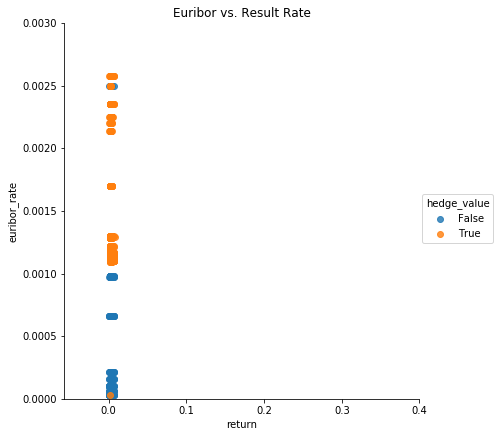

In [14]:
lm= sns.lmplot(y='euribor_rate', x='return', data=train, 
           hue='hedge_value', fit_reg=False, size=6
          )
lm.set(ylim=(0, 0.0030))
lm.set(xlim=(None, 0.4))
plt.title('Euribor vs. Result Rate')

In [15]:
print train[ train['euribor_rate'] > 0.0010 ]['hedge_value'].value_counts()
print train[ train['euribor_rate'] > 0.0010 ]['euribor_rate'].min()

True     1227
False      69
Name: hedge_value, dtype: int64
0.00109


In [16]:
#filling hedge_value 
def fill_hedge(col):
    Hedge = col[0]
    Euribor = col[1]
    if pd.isnull(Hedge):
        if Euribor > 0.0010:
            return True
        else:
            return False
    else:
        return Hedge

In [17]:
train['hedge_value']=train[['hedge_value',
                                    'euribor_rate']].apply(fill_hedge, axis=1)

In [18]:
train

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,B,2004-07-20,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,2004-07-20,NaN,2004-08-12,B,True,NaN,0.02496
1,A,2004-07-09,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,2004-07-23,NaN,2004-08-12,C,True,NaN,0.05496
2,A,2004-07-23,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,2004-07-23,NaN,2004-08-17,A,True,NaN,0.02496
3,A,2004-06-09,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,2004-07-23,NaN,2004-07-13,A,True,NaN,0.02496
4,B,2004-06-09,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,2004-07-23,NaN,2004-07-13,B,True,NaN,0.02496
5,A,2004-07-07,48741000.0,T,0.02074,USD,2.332216,4.865127e+07,2004-07-26,NaN,2004-08-10,A,True,NaN,0.02490
6,A,2004-07-06,60593500.0,T,0.02074,USD,2.332216,6.048181e+07,2004-07-26,NaN,2004-08-09,A,True,NaN,0.02493
7,B,2004-07-06,134200000.0,T,0.02074,USD,2.332216,1.339526e+08,2004-07-26,NaN,2004-08-09,B,True,NaN,0.02493
8,A,2004-04-19,82929000.0,T,0.02074,USD,2.332216,8.250616e+07,2004-07-26,NaN,2004-07-20,A,True,NaN,0.02460
9,A,2004-04-14,212476000.0,T,0.02074,USD,2.332216,2.114140e+08,2004-07-27,NaN,2004-07-13,A,True,NaN,0.02466


In [19]:
# Making the catergorical dummy vars
train_df = pd.get_dummies(train, 
                          columns=['pf_category',
                                   'country_code',
                                   'currency',
                                   'type',
                                  'indicator_code',
                                  'status',
                                  'hedge_value'])
train_df.head()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,return,pf_category_A,pf_category_B,...,type_C,type_D,type_E,type_F,type_G,type_H,indicator_code_True,status_True,hedge_value_False,hedge_value_True
0,2004-07-20,110000000.0,0.02074,2.332216,1.098097e+08,2004-07-20,2004-08-12,0.02496,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2004-07-09,176671000.0,0.02074,5.269617,1.760084e+08,2004-07-23,2004-08-12,0.05496,1,0,...,1,0,0,0,0,0,0,0,0,1
2,2004-07-23,56474000.0,0.02074,2.332216,5.637953e+07,2004-07-23,2004-08-17,0.02496,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2004-06-09,164813000.0,0.02074,2.332216,1.645088e+08,2004-07-23,2004-07-13,0.02496,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2004-06-09,140800000.0,0.02074,2.332216,1.405402e+08,2004-07-23,2004-07-13,0.02496,0,1,...,0,0,0,0,0,0,0,0,0,1


In [20]:
print train_df['indicator_code_True'].value_counts()
print train_df['status_True'].value_counts()
print train_df['hedge_value_True'].value_counts()

0    5699
1    3667
Name: indicator_code_True, dtype: int64
1    6282
0    3084
Name: status_True, dtype: int64
1    6929
0    2437
Name: hedge_value_True, dtype: int64


In [21]:
train_df.to_csv('train_df_tableau.csv')

In [22]:
train_df.head()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,return,pf_category_A,pf_category_B,...,type_C,type_D,type_E,type_F,type_G,type_H,indicator_code_True,status_True,hedge_value_False,hedge_value_True
0,2004-07-20,110000000.0,0.02074,2.332216,1.098097e+08,2004-07-20,2004-08-12,0.02496,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2004-07-09,176671000.0,0.02074,5.269617,1.760084e+08,2004-07-23,2004-08-12,0.05496,1,0,...,1,0,0,0,0,0,0,0,0,1
2,2004-07-23,56474000.0,0.02074,2.332216,5.637953e+07,2004-07-23,2004-08-17,0.02496,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2004-06-09,164813000.0,0.02074,2.332216,1.645088e+08,2004-07-23,2004-07-13,0.02496,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2004-06-09,140800000.0,0.02074,2.332216,1.405402e+08,2004-07-23,2004-07-13,0.02496,0,1,...,0,0,0,0,0,0,0,0,0,1


In [23]:
train_df['start_date_day'] = train_df['start_date'].dt.day
train_df['start_date_month'] = train_df['start_date'].dt.month

train_df['creation_date_day'] = train_df['creation_date'].dt.day
train_df['creation_date_month'] = train_df['creation_date'].dt.month

train_df['sell_date_day'] = train_df['sell_date'].dt.day
train_df['sell_date_month'] = train_df['sell_date'].dt.month


In [24]:
train_df.drop(['start_date','creation_date','sell_date'], axis=1, inplace=True)